# Cropping Image

image dimension: (343, 514, 3)


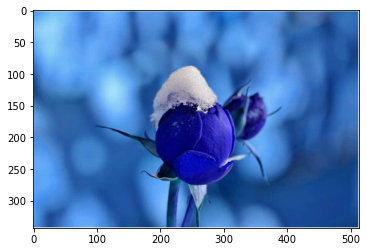

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('../assets/images/example_img.png')

# Image dimensions
print(f"image dimension: {img.shape}")

# Display image
plt.imshow(img)
plt.show()


## 1. Cropping using OpenCV

Có thể sử dụng phương pháp slicing để cắt ra phần ảnh

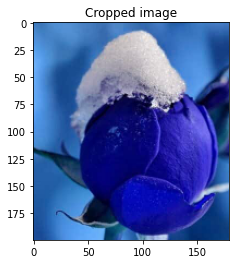

In [11]:
cropped_image = img[80: 280, 150:330]

plt.imshow(cropped_image)
plt.title('Cropped image')
plt.show()

## 2. Dividing an Image Into Small Patches Using Cropping

In [12]:
image_copy = img.copy()

img_height = img.shape[0]
img_width = img.shape[1]


Ví dụ dưới đây sử dụng các patches images có size là `104x76`

In [13]:
M = 76
N = 104
x1 = 0
y1 = 0

for y in range(0, img_height, M):
    for x in range(0, img_width, N):
        if (img_height - y) < M or (img_width - x) < N:
            break
            
        y1 = y + M
        x1 = x + N

        # check whether the patch width or height exceeds the image width or height
        if x1 >= img_width and y1 >= img_height:
            x1 = img_width - 1
            y1 = img_height - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif y1 >= img_height: # when patch height exceeds the image height
            y1 = img_height - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= img_width: # when patch width exceeds the image width
            x1 = img_width - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

In [14]:
#Save full image into file directory
cv2.imshow("Patched Image",img)
cv2.imwrite("patched.jpg",img)
 
cv2.waitKey()
cv2.destroyAllWindows()